# Conditional Graph

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [4]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalnumber: int

In [5]:
def adder(state:AgentState)-> AgentState:
    """This nodes adds 2 numbers"""

    state["finalnumber"] = state["number1"] + state["number2"]

    return state

In [6]:
def subractor(state:AgentState)-> AgentState:
    """This nodes subracts 2 numbers"""

    state["finalnumber"] = state["number1"] - state["number2"]

    return state

In [18]:
def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"

    elif state["operation"] == "-":
        return "subtraction_operation"

In [19]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subract_node",subractor)
graph.add_node("router", lambda state:state) # passthrough function -just a checker


graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subract_node"
    }

)

graph.add_edge("add_node",END)
graph.add_edge("subract_node",END)


app = graph.compile()

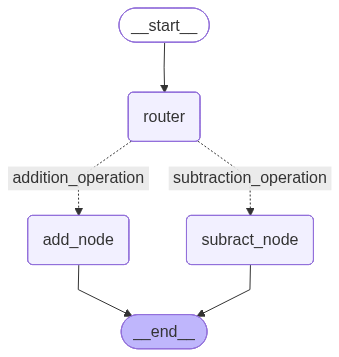

In [20]:
app

In [21]:
test = AgentState(number1 = 10, operation = "+", number2 = 20)

print(app.invoke(test))

{'number1': 10, 'operation': '+', 'number2': 20, 'finalnumber': 30}


In [22]:
print(app.invoke(input = {
    "number1" : 100,
    "number2" : 200,
    "operation" : "-"
}))

{'number1': 100, 'operation': '-', 'number2': 200, 'finalnumber': -100}
